<a href="https://colab.research.google.com/github/carolina-garay/Henry_M6_ProyectoIntegrador/blob/main/P_Integrador_2A_Preparacion_de_datos_Garay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

**Alumna: Carolina del Valle Garay**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento.

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




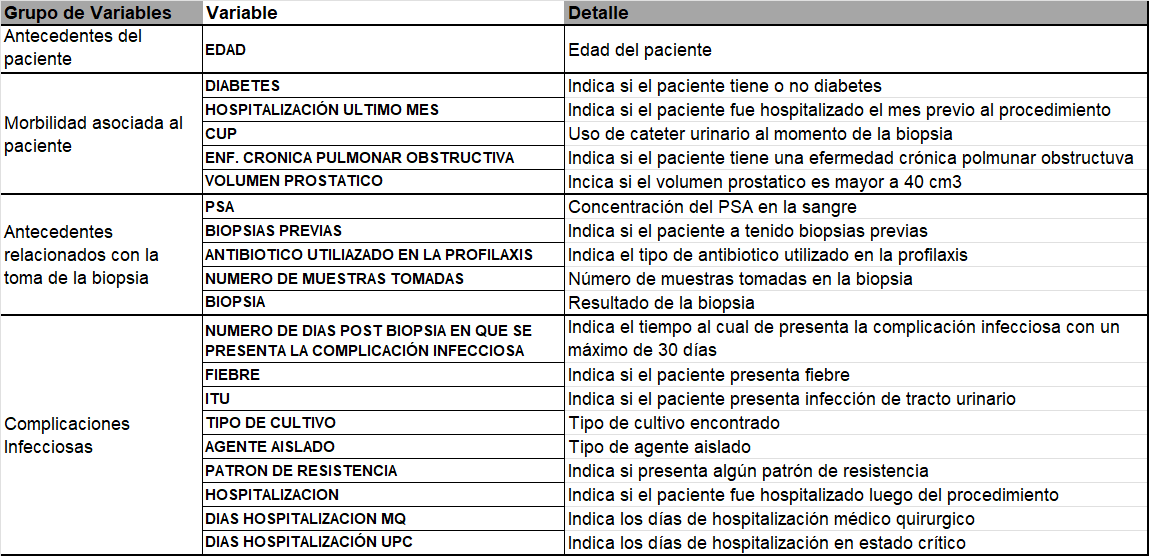

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 808.9 kB/s eta 0:00:00


Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from category_encoders import one_hot

In [ ]:
!gdown https://docs.google.com/spreadsheets/d/13bcW-DR_x5NG7w0LoWct1gq9HrJ4Q1Z4/edit?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=13bcW-DR_x5NG7w0LoWct1gq9HrJ4Q1Z4
To: /content/BBDD_Hospitalización.xlsx
100% 65.4k/65.4k [00:00<00:00, 54.1MB/s]


Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [ ]:
df = pd.read_excel('/content/BBDD_Hospitalización.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
#Visualizamos rapidamente el dataframe
df[:10]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
5,55.0,SI,SI,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,NO,NO,NO,NO,NO,SI,3.0,0.0
6,53.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,SI,UROCULTIVO,E.COLI,"RESISTENTE A AMPI, CIPRO Y GENTA",SI,3.0,0.0
7,67.0,NO,NO,6.2,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,SI,HEMOCULTIVO Y UROCULTIVO,E.COLI,"RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROX...",SI,2.0,0.0
8,69.0,NO,NO,6.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,4.0,0.0
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0


In [ ]:
#Imprimimos cantidad de filas y columnas
df.shape

(570, 20)

In [ ]:
#Imprimimos tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [ ]:
#Imprimimos una visulización rápida de cantidades estadísticas
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


In [ ]:
#Revisamos si hay registros duplicados y encontramos que sí los hay
df.duplicated().any()

True

<Axes: >

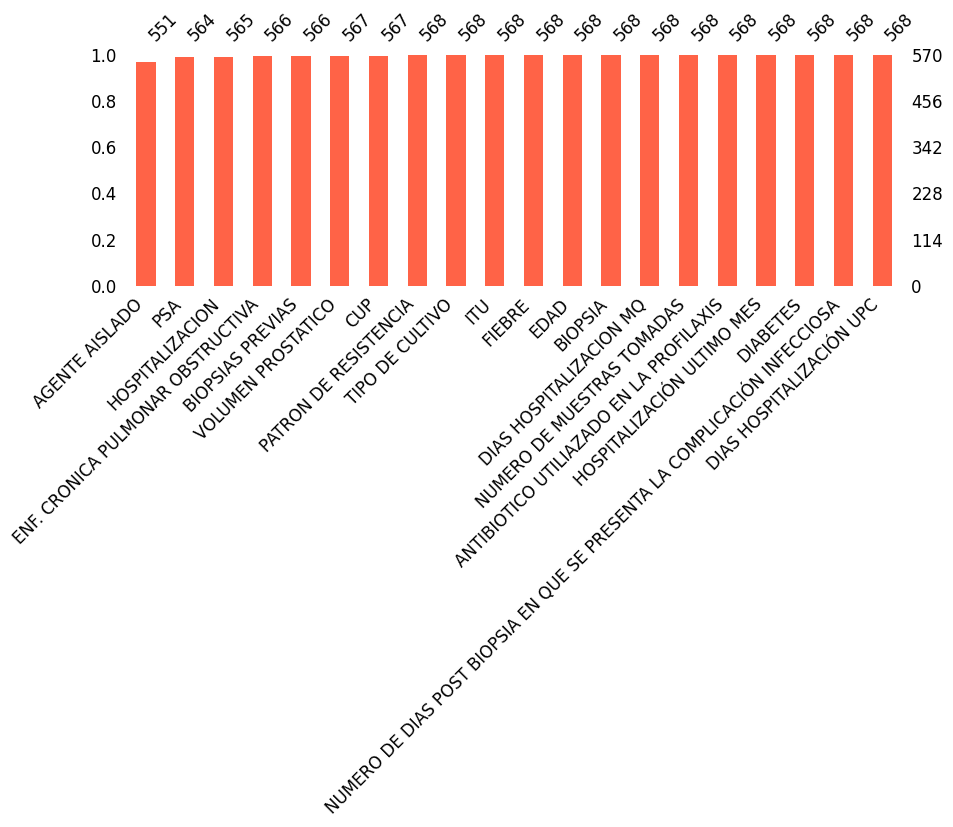

In [ ]:
# Análisis de datos faltantes mediante missingno
# Graficamos datos faltantes de las variables, incluidas las de interés. Observamos que hay valores faltantes pero representan un porcentaje bajo del total
msno.bar(df,figsize=(10, 3), sort="ascending",fontsize=12, color='tomato')

Dado que la variable a predecir "Hospitalización" tiene 3 datos faltantes, procedemos a eliminar ésas filas

In [ ]:
df1 = df.dropna(subset=['HOSPITALIZACION'])

In [ ]:
#Imprimimos el tamaño del nuevo dataframe
df1.shape

(565, 20)

<Axes: >

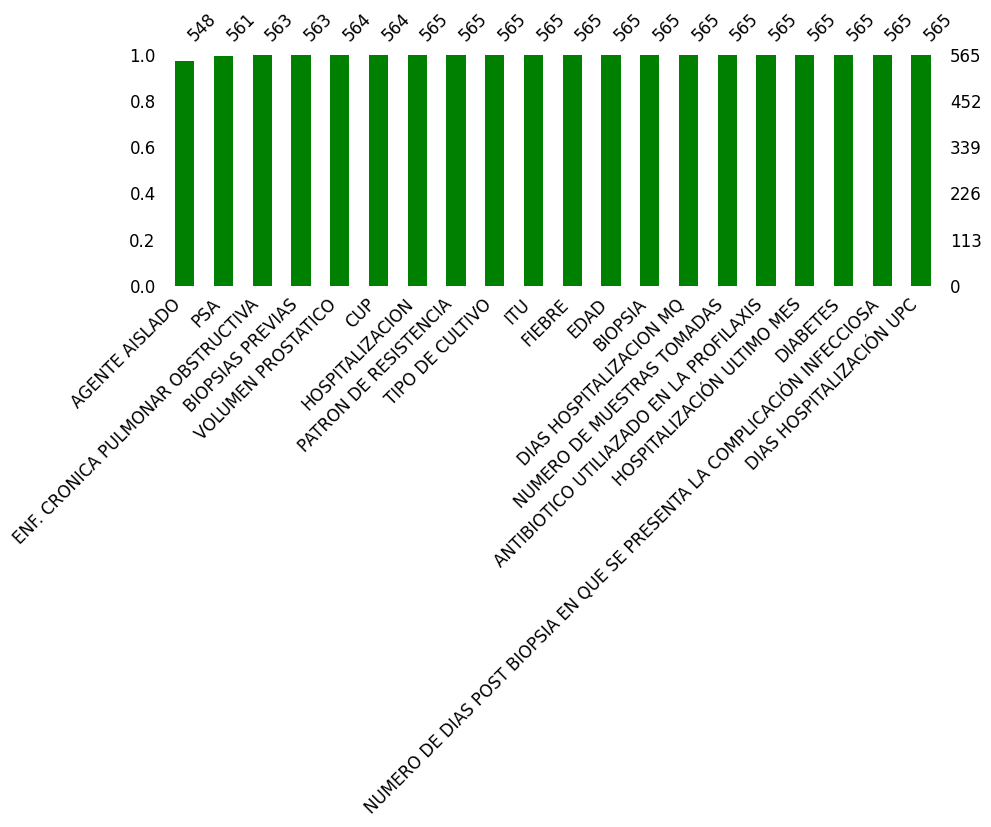

In [ ]:
msno.bar(df1,figsize=(10, 3), sort="ascending",fontsize=12, color='green')

Imprimimos nombre de las columnas

In [ ]:
df1.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC'],
      dtype='object')

Elegimos 12 variables relevantes de acuerdo a la información que representa cada una

In [ ]:
#Elegimos 12 variables relevantes
df2 = df1[['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'VOLUMEN PROSTATICO',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'HOSPITALIZACION',
           'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC']]

Renombramos las columnas

In [ ]:
df2 = df2.rename(columns = {'ENF. CRONICA PULMONAR OBSTRUCTIVA' : 'Enfermedad_pulmonar'})
df2 = df2.rename(columns = {'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA':'nro_dias_post_bipsia_infeccion'})
df2 = df2.rename(columns = {'DIAS HOSPITALIZACION MQ':'dias_hosp_quirurgica'})
df2 = df2.rename(columns = {'DIAS HOSPITALIZACIÓN UPC':'dias_hosp_pac_critico'})
df2 = df2.rename(columns = {'HOSPITALIZACIÓN ULTIMO MES':'hospitaliz_ult_mes'})
df2 = df2.rename(columns = {'VOLUMEN PROSTATICO':'vol_prostatico'})
df2 = df2.rename(columns = {'EDAD':'edad', 'DIABETES': 'diabetes', 'FIEBRE':'fiebre', 'ITU':'infecc_tract_urinario' })

In [ ]:
df2.columns

Index(['edad', 'diabetes', 'hospitaliz_ult_mes', 'PSA', 'vol_prostatico',
       'Enfermedad_pulmonar', 'BIOPSIA', 'nro_dias_post_bipsia_infeccion',
       'fiebre', 'infecc_tract_urinario', 'HOSPITALIZACION',
       'dias_hosp_quirurgica', 'dias_hosp_pac_critico'],
      dtype='object')

### Eliminamos outliers para las variable numérica edad

In [ ]:
#Mostramos los valores mayores a 100 años
df2[(df2["edad"]>100)]

,edad,diabetes,hospitaliz_ult_mes,PSA,vol_prostatico,Enfermedad_pulmonar,BIOPSIA,nro_dias_post_bipsia_infeccion,fiebre,infecc_tract_urinario,HOSPITALIZACION,dias_hosp_quirurgica,dias_hosp_pac_critico
161,143.0,SI,NO,6.8,NO,NO,NEG,NO,NO,NO,NO,0.0,0.0
181,151.0,NO,NO,5.7,SI,NO,NEG,NO,NO,NO,NO,0.0,0.0


Eliminamos las dos edades que representan outliers

In [ ]:

df2= df2.drop(df2[(df2["edad"]>100)].index)

Comprobamos que se eliminaron los dos valores

In [ ]:
df2[(df2["edad"]>100)]

,edad,diabetes,hospitaliz_ult_mes,PSA,vol_prostatico,Enfermedad_pulmonar,BIOPSIA,nro_dias_post_bipsia_infeccion,fiebre,infecc_tract_urinario,HOSPITALIZACION,dias_hosp_quirurgica,dias_hosp_pac_critico


## Reemplazamos los valores categóricos "Si" y "No" por 1 y 0 respectivamente

In [ ]:
df2.value_counts('Enfermedad_pulmonar')

Enfermedad_pulmonar
NO          542
SI           12
SI, EPOC      4
SI, ASMA      3
Name: count, dtype: int64

In [ ]:
df2['Enfermedad_pulmonar'] = df2['Enfermedad_pulmonar'].replace({'SI, EPOC': 'SI', 'SI, ASMA':'SI'})

In [ ]:
df2.value_counts('Enfermedad_pulmonar')

Enfermedad_pulmonar
NO    542
SI     19
Name: count, dtype: int64

In [ ]:
df2.columns


Index(['edad', 'diabetes', 'hospitaliz_ult_mes', 'PSA', 'vol_prostatico',
       'Enfermedad_pulmonar', 'BIOPSIA', 'nro_dias_post_bipsia_infeccion',
       'fiebre', 'infecc_tract_urinario', 'HOSPITALIZACION',
       'dias_hosp_quirurgica', 'dias_hosp_pac_critico'],
      dtype='object')

Agrupamos las variables categóricas a las que se les aplicarán las transformaciones

In [ ]:
categorical_column= ['diabetes', 'hospitaliz_ult_mes', 'vol_prostatico',
       'Enfermedad_pulmonar', 'fiebre', 'infecc_tract_urinario', 'HOSPITALIZACION']

In [ ]:
df2[categorical_column] = df2[categorical_column].replace({'SI': 1, 'NO': 0})

<Axes: >

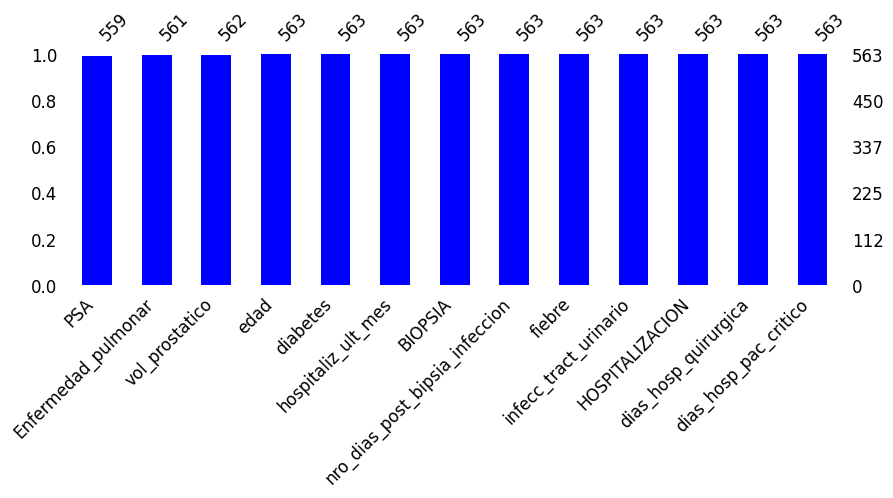

In [ ]:
msno.bar(df2,figsize=(10, 3), sort="ascending",fontsize=12, color='blue')

# Imputación

Dado que la información médica con la que estamos trabajando es sensible, no realizamos imputación con las técnicas más conocidas. Vamos a reemplazar los NAN por el valor -1 y crear una nueva columna que por cada -1 reemplazado se corresponda con un 0, y para los valores que no son NAN se correspondan con 1.

Las columnas a imputar son 3:
- PSA                               
- vol_prostatico                    
- Enfermedad_pulmonar


---



Imprimimos cantidad de categorías que toma cada variable categórica

In [ ]:
df2['BIOPSIA'].nunique()

11

In [ ]:
df2['nro_dias_post_bipsia_infeccion'].nunique()

6

In [ ]:
df2.value_counts('nro_dias_post_bipsia_infeccion')

nro_dias_post_bipsia_infeccion
NO    537
2       9
3       8
1       5
5       2
9       2
Name: count, dtype: int64

### Reemplazamos el valor NO por 0 en la variable "nro_dias_post_biopsia_infeccion"

In [ ]:
df2['nro_dias_post_bipsia_infeccion'] = df2['nro_dias_post_bipsia_infeccion'].replace({'NO':0})

In [ ]:
df2.value_counts('nro_dias_post_bipsia_infeccion')

nro_dias_post_bipsia_infeccion
0    537
2      9
3      8
1      5
5      2
9      2
Name: count, dtype: int64

### Categorizamos la variable BIOPSIA.
Método : Codificación OneHotEncoder utilizando librería category_encoders

In [ ]:
# Creación de instancias del objeto OHE de codificadores de categoría
#El parámetro "use_cat_names = True" permite que los valores de categoría
#se incluyan en los nombres de columna
ce_ohe = one_hot.OneHotEncoder(use_cat_names = True)

In [ ]:
ce_dummies = ce_ohe.fit_transform(df2['BIOPSIA'])

In [ ]:
ce_dummies

,BIOPSIA_NEG,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 10,BIOPSIA_ADENOCARCINOMA GLEASON 9,BIOPSIA_ADENOCARCINOMA GLEASON 8,BIOPSIA_PROSTATITIS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
563,0,0,0,1,0,0,0,0,0,0,0
564,0,0,1,0,0,0,0,0,0,0,0
565,1,0,0,0,0,0,0,0,0,0,0
566,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Eliminamos la variable que fue codificada
df2 = df2.drop(columns=['BIOPSIA'])

In [ ]:
#Unimos el dataframe original con el codificado
df_new = pd.concat([ce_dummies,df2], axis = 1)

In [ ]:
df3= df_new.copy()

### Comprobamos que todas las variables ya son numéricas


In [ ]:
df3.dtypes

BIOPSIA_NEG                                             int64
BIOPSIA_ADENOCARCINOMA GLEASON 6                        int64
BIOPSIA_ADENOCARCINOMA GLEASON 7                        int64
BIOPSIA_ADENOCARCINOMA GLEASON 6                        int64
BIOPSIA_ADENOCARCINOMA GLEASON 10                       int64
BIOPSIA_ADENOCARCINOMA GLEASON 9                        int64
BIOPSIA_ADENOCARCINOMA GLEASON 8                        int64
BIOPSIA_PROSTATITIS                                     int64
BIOPSIA_HIPERPLASIA PROSTATICA                          int64
BIOPSIA_ADENOCARCINOMA GLEASON 7                        int64
BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS      int64
edad                                                  float64
diabetes                                                int64
hospitaliz_ult_mes                                      int64
PSA                                                   float64
vol_prostatico                                        float64
Enfermed

In [ ]:
df3

,BIOPSIA_NEG,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 10,BIOPSIA_ADENOCARCINOMA GLEASON 9,BIOPSIA_ADENOCARCINOMA GLEASON 8,BIOPSIA_PROSTATITIS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_ADENOCARCINOMA GLEASON 7,...,hospitaliz_ult_mes,PSA,vol_prostatico,Enfermedad_pulmonar,nro_dias_post_bipsia_infeccion,fiebre,infecc_tract_urinario,HOSPITALIZACION,dias_hosp_quirurgica,dias_hosp_pac_critico
0,1,0,0,0,0,0,0,0,0,0,...,0,4.00,1.0,0.0,1,1,0,1,2.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0,7.70,1.0,0.0,1,1,0,1,5.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0,29.00,1.0,0.0,1,1,0,1,4.0,3.0
3,1,0,0,0,0,0,0,0,0,0,...,0,7.00,1.0,0.0,1,1,0,1,5.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,0,29.00,1.0,0.0,1,1,0,1,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,0,0,0,1,0,0,0,0,0,0,...,0,6.00,1.0,0.0,0,0,0,0,0.0,0.0
564,0,0,1,0,0,0,0,0,0,0,...,0,4.80,1.0,0.0,0,0,0,0,0.0,0.0
565,1,0,0,0,0,0,0,0,0,0,...,0,4.43,NaN,0.0,0,0,0,0,0.0,0.0
566,0,0,1,0,0,0,0,0,0,0,...,0,8.00,1.0,NaN,0,0,0,0,0.0,0.0


In [ ]:
#Comprobamos si hay valores nulos
df3.isnull().sum()

BIOPSIA_NEG                                           0
BIOPSIA_ADENOCARCINOMA GLEASON 6                      0
BIOPSIA_ADENOCARCINOMA GLEASON 7                      0
BIOPSIA_ADENOCARCINOMA GLEASON 6                      0
BIOPSIA_ADENOCARCINOMA GLEASON 10                     0
BIOPSIA_ADENOCARCINOMA GLEASON 9                      0
BIOPSIA_ADENOCARCINOMA GLEASON 8                      0
BIOPSIA_PROSTATITIS                                   0
BIOPSIA_HIPERPLASIA PROSTATICA                        0
BIOPSIA_ADENOCARCINOMA GLEASON 7                      0
BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS    0
edad                                                  0
diabetes                                              0
hospitaliz_ult_mes                                    0
PSA                                                   4
vol_prostatico                                        1
Enfermedad_pulmonar                                   2
nro_dias_post_bipsia_infeccion                  

### Reemplazmos los valores NAN por -1

In [ ]:
df3 = df3.fillna(-1)

Comprobamos que no hayan valores nulos

In [ ]:
df3.isnull().sum()

BIOPSIA_NEG                                           0
BIOPSIA_ADENOCARCINOMA GLEASON 6                      0
BIOPSIA_ADENOCARCINOMA GLEASON 7                      0
BIOPSIA_ADENOCARCINOMA GLEASON 6                      0
BIOPSIA_ADENOCARCINOMA GLEASON 10                     0
BIOPSIA_ADENOCARCINOMA GLEASON 9                      0
BIOPSIA_ADENOCARCINOMA GLEASON 8                      0
BIOPSIA_PROSTATITIS                                   0
BIOPSIA_HIPERPLASIA PROSTATICA                        0
BIOPSIA_ADENOCARCINOMA GLEASON 7                      0
BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS    0
edad                                                  0
diabetes                                              0
hospitaliz_ult_mes                                    0
PSA                                                   0
vol_prostatico                                        0
Enfermedad_pulmonar                                   0
nro_dias_post_bipsia_infeccion                  

Creamos las columnas de referencia para las variables imputadas

In [ ]:
df3['PSA_ref'] = np.where(df3['PSA'] == -1, 0, 1)

In [ ]:
df3['Enf_pulmonar_ref'] = np.where(df3['Enfermedad_pulmonar'] == -1, 0, 1)

In [ ]:
df3['vol_prostatico_ref'] = np.where(df3['vol_prostatico'] == -1, 0, 1)

<Axes: >

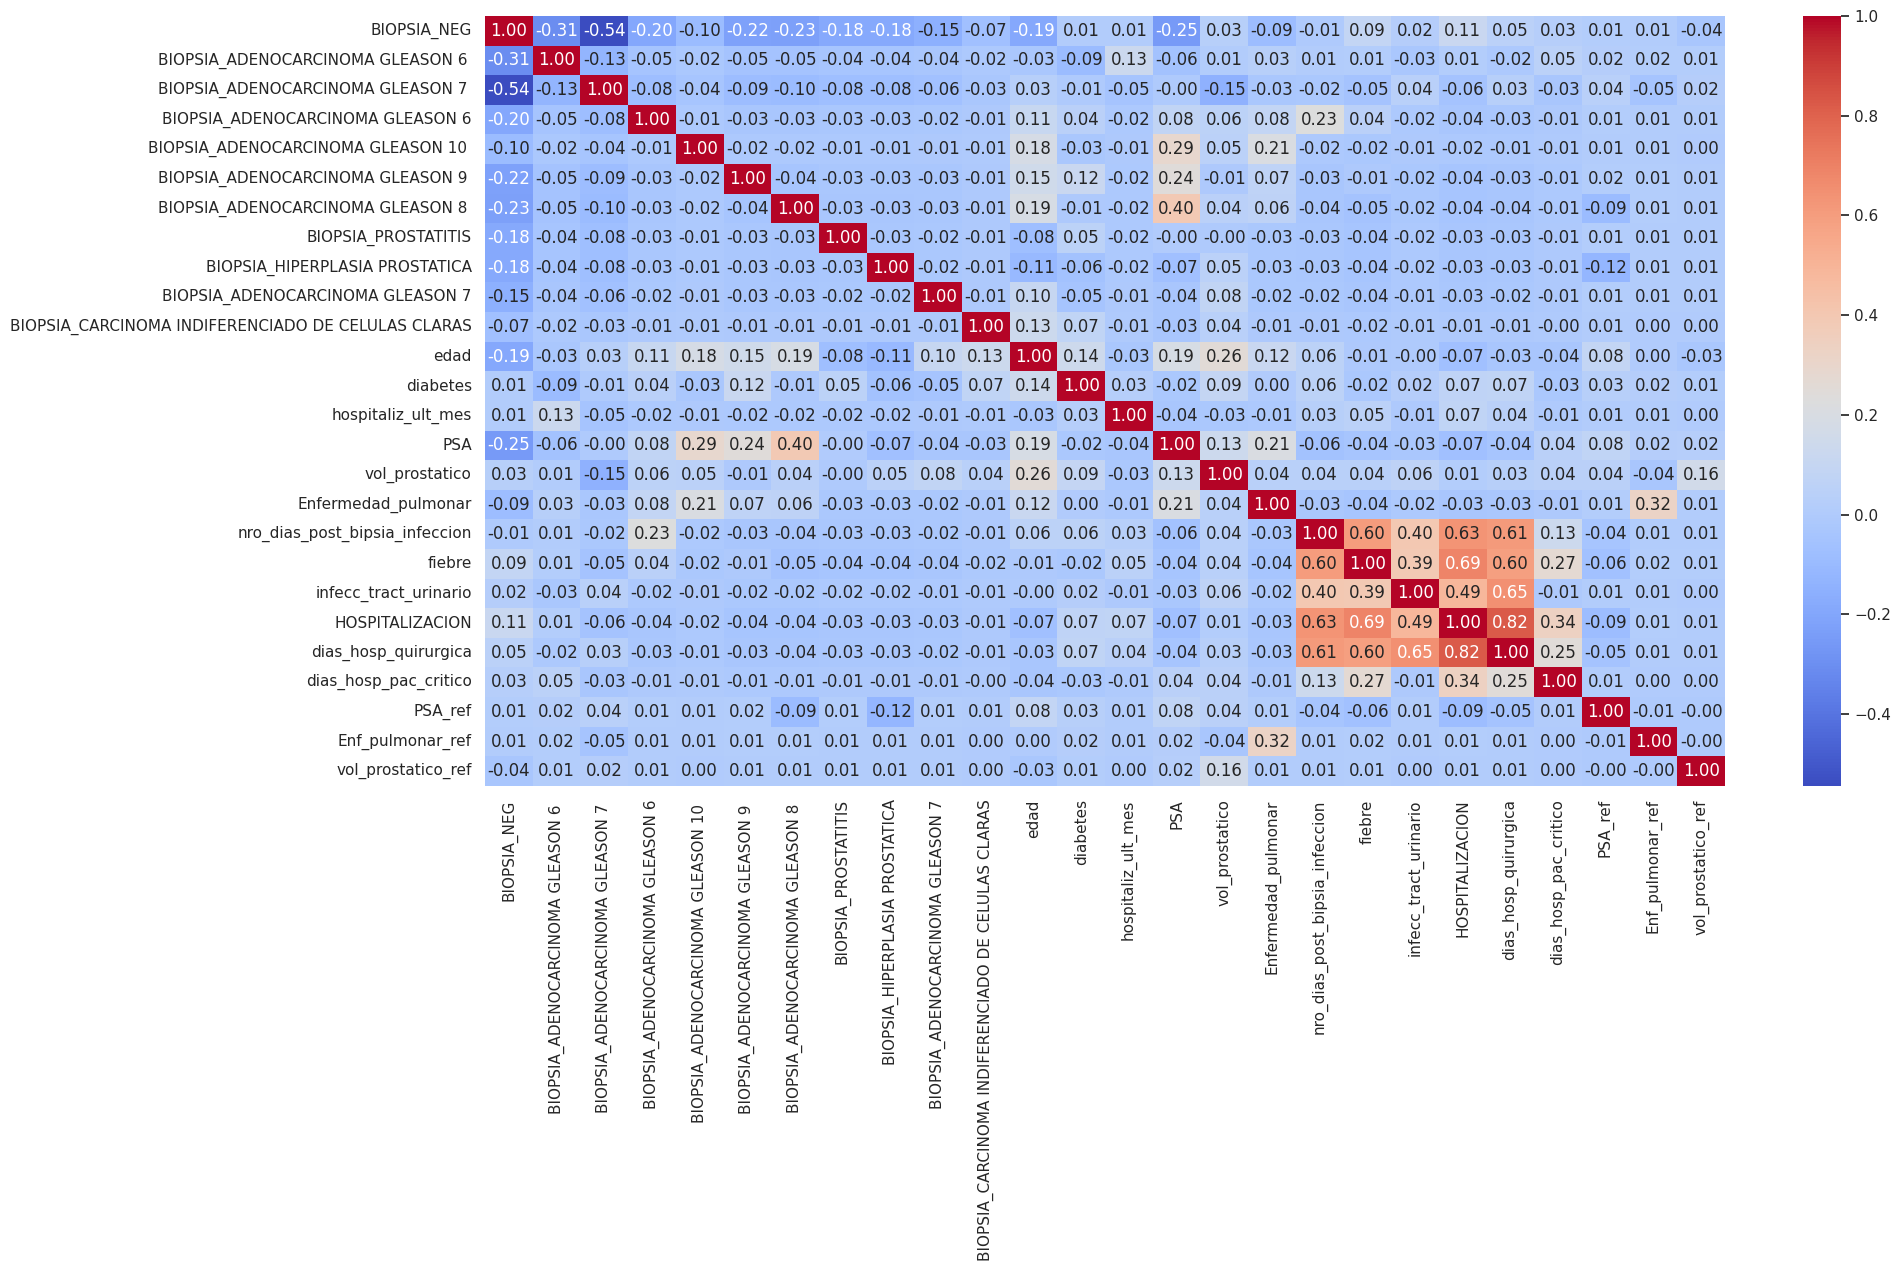

In [ ]:
# Analizamos la correlación de variables
plt.figure(figsize = (20,10))
sns.set(font_scale=1)
sns.heatmap(df3.corr(), annot = True, cmap = 'coolwarm', fmt=".2f")

Exportamos
 la base de datos preparada en un archivo .csv para el modelamiento.

In [ ]:
df3.to_csv('Hospital_Garay.csv', header= True, index=False)

In [ ]:
from google.colab import files
files.download('Hospital_Garay.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>